# Zadanie 3
Analiza zbioru danych Breast Cancer Wisconsin:
o Wczytaj zbiór danych Breast Cancer Wisconsin.
o Przeprowadź czyszczenie i przygotowanie danych, usuwając brakujące wartości,
skalując cechy itp.
o Podziel zbiór danych na zestawy treningowy i testowy.
o Zbuduj model regresji logistycznej do klasyfikacji nowotworów jako łagodnych lub
złośliwych.
o Oceń jakość klasyfikatora za pomocą różnych metryk oceny, takich jak dokładność,
precyzja, czułość i specyficzność.
o Zinterpretuj wyniki i porównaj je z innymi modelami, jeśli to możliwe.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import  numpy as np 

In [ ]:
# Wczytanie danych
data = load_breast_cancer()
# Podział danych na zbiór cech (X) i etykietę (y)
X = data.data
y = data.target

if True in np.isnan(X):
    print("tak")
else:
    print("nie")

In [ ]:
X

In [ ]:
y

In [18]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [19]:
# Inicjalizacja i trenowanie modelu regresji logistycznej
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Predykcja etykiet dla danych testowych
y_pred = logistic_regression.predict(X_test)

In [21]:
# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu regresji logistycznej:", accuracy)

Dokładność modelu regresji logistycznej: 0.9649122807017544


In [22]:
# Obliczenie precyzji
precision = precision_score(y_test, y_pred, average='micro')
print("Precyzna modelu: {:.2f}%".format(precision * 100))

Precyzna modelu: 96.49%


In [23]:
# Czułość modelu:
recall = recall_score(y_test, y_pred, average='micro')
print("Czułość modelu: {:.2f}%".format(recall * 100))

Czułość modelu: 96.49%


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
def specificity_score(y_true, y_pred):
 tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
 specificity = tn / (tn + fp)
 return specificity
# Obliczenie specyficzności
specificity = specificity_score(y_test, y_pred)
print("Specyficzność:", specificity)

Specyficzność: 0.9302325581395349


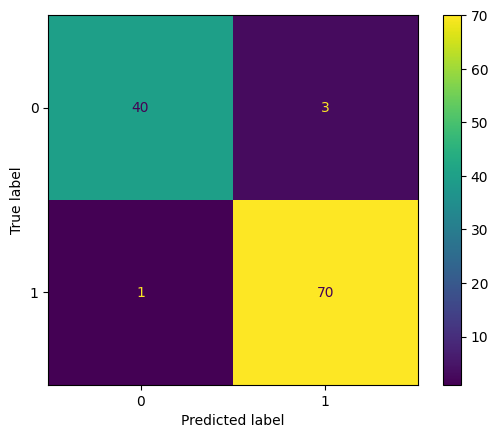

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Wnioski
Nasz Model jest prawie idealny w rozpoznawaniu czy osoba jest chora.